# What is EDA?
 Exploratory Data Analysis: unavoidable and one of the major step to fine-tune the given dataset in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like columns, rows by applying Pandas, NumPy, Statistical Methods, and Data visualization packages.

# ML process flow

<img src='images/39379ML-flow.png' width="1200"/>

<img src='images/24537Zoom-EDA.png' width="1200"/>

In [11]:
# to get Jupyter display all the variables values, not only the last one (without having to use print)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing


# Data Collection

In [21]:
# Let's use the Automobile – Predictive Analysis dataset
# https://www.kaggle.com/datasets/uciml/autompg-dataset/kaggle.json
df_cars = pd.read_csv('data/auto-mpg.csv', sep=',', header=0, on_bad_lines='error')
df_cars.head()
df_cars.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Data Cleaning, type conversion

In [24]:
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)
df_cars.horsepower = df_cars.horsepower.astype(int)
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [47]:
df_cars['brand'] = df_cars['car name'].str.split(' ', expand=False).map(lambda l: l[0])
df_cars['name'] = df_cars['car name'].str.split(' ', expand=False).map(lambda l: ' '.join(l[1:]))
df_cars.drop(['car name'], axis=1, inplace=True)  # drop the original column since it's become redundant
df_cars.columns
df_cars.head()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'name', 'brand'],
      dtype='object')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,torino,ford


In [53]:
df_cars['brand'].value_counts().sort_index()
print("There are misspelled brands")
print("One 'brand' (hi) is suspicious")

brand
amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: count, dtype: int64

There are misspelled brands
One 'brand' (hi) is suspicious


In [ ]:
# Correct the misspelled brand names (there are none, but let's pretend)
df_cars['brand'] = df_cars['brand'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['brand'] = df_cars['brand'].str.replace('maxda|mazda','mazda')
df_cars['brand'] = df_cars['brand'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['brand'] = df_cars['brand'].str.replace('toyota|toyouta','toyota')
df_cars['brand'] = df_cars['brand'].str.replace('vokswagen|volkswagen|vw','volkswagen')

In [109]:
df_cars.reset_index(inplace=True)  # to make sure both 'brand' and 'name' and in the columns
df_cars[['brand','name']].value_counts().sort_index()
print("There are no more misspelled brands")

brand  name               
amc    ambassador brougham    1
       ambassador dpl         1
       ambassador sst         1
       concord                2
       concord d/l            1
                             ..
vw     dasher (diesel)        1
       pickup                 1
       rabbit                 2
       rabbit c (diesel)      1
       rabbit custom          1
Name: count, Length: 305, dtype: int64

There are no more misspelled brands


# Statistics

In [110]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


# Missing values

In [111]:
# let's replace missing values of horsepower with mean value
meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)

# Skewness and kurtosis
<div style='font-size:23px'>
Skewness and kurtosis are two key statistical concepts that help provide insights into the shape and characteristics of a dataset during EDA.

Skewness measures the asymmetry of a probability distribution of a real-valued random variable about its mean. It can take positive or negative values.

- Positive skewness indicates that the tail on the right side (greater than the mean) of the distribution is longer or fatter than the left side.
- Negative skewness signifies that the tail on the left side (less than the mean) is longer or fatter than the right side.

If the data are highly skewed, certain statistical techniques may be less valid, and data transformations may be needed.

Kurtosis gauges the "tailedness" of a probability distribution. In simple words, it's a measure of the heaviness of the tails of a distribution compared to a normal distribution.

- High kurtosis (>3 for a normal distribution) means the distribution has heavier tails and a sharper peak, i.e., more outliers.
- Low kurtosis (<3 for a normal distribution) indicates lighter tails and a flatter peak, i.e., fewer outliers.

Kurtosis can indicate the presence of outliers. Extreme values can have a disproportionate influence on statistical results and can lead to incorrect conclusions if not handled properly.
</div>

In [112]:
# Finding the Skewness and Kurtosis of mpg feature

print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


# Categorical variables

In [113]:
# Replacing the categorical variable with actual values

df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars.head()

,brand,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,chevrolet,chevelle malibu,18.0,8,307.0,130,3504,12.0,70,america
1,buick,skylark 320,15.0,8,350.0,165,3693,11.5,70,america
2,plymouth,satellite,18.0,8,318.0,150,3436,11.0,70,america
3,amc,rebel sst,16.0,8,304.0,150,3433,12.0,70,america
4,ford,torino,17.0,8,302.0,140,3449,10.5,70,america


# Create Dummy Variables

Values like ‘america’ cannot be read into an equation.
So we create 3 simple true or false columns with titles equivalent to “Is this car America?”, “Is this care European?” and “Is this car Asian?”.
These will be used as independent variables without imposing any kind of ordering between the three regions. Let’s apply the below code.

In [116]:
cData = pd.get_dummies(df_cars, columns=['origin'], prefix=[''])  # no prefix to shorten the column names
cData.head()

,brand,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,_america,_asia,_europe
0,chevrolet,chevelle malibu,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,buick,skylark 320,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,plymouth,satellite,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,amc,rebel sst,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,ford,torino,17.0,8,302.0,140,3449,10.5,70,True,False,False


# Removing Columns

For this analysis, we won’t be needing the brand and model features, so we can drop them.

In [154]:
df_cars.drop(['brand','name'], axis=1,inplace=True)
df_cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

# Univariate Analysis
“Uni” + “Variate”  means one variable or feature analysis.
The univariate analysis basically tells us how data in each feature is distributed.


/var/folders/_7/l27q9gzx5j3gtjx6jghdr42c0000gp/T/ipykernel_89764/2752480154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df_cars["mpg"])


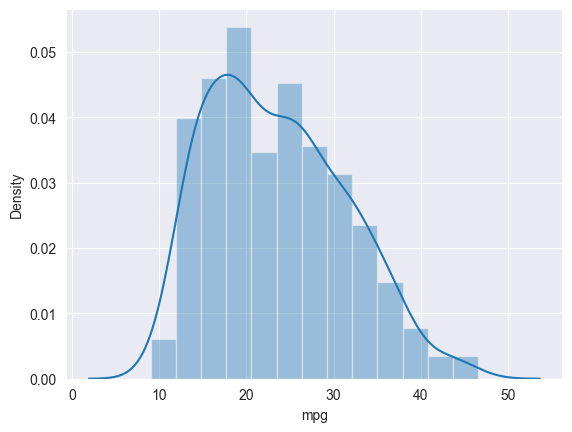

In [117]:
sns_plot = sns.distplot(df_cars["mpg"])

In [144]:
def histplot(df, title=None, kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), **kwargs):
    sns.histplot(df,
                 kde=kde,
                 stat=stat,
                 kde_kws=kde_kws,
                 alpha=alpha, edgecolor=edgecolor,
                 **kwargs)
    if title is not None:
        plt.title(title)

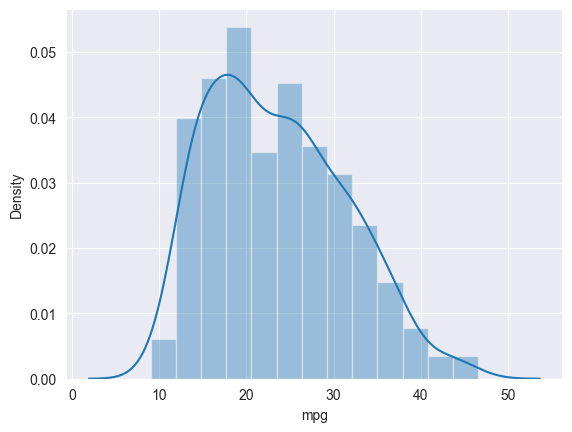

In [142]:
histplot(df_cars["mpg"])

# Bivariate Analysis
“Bi” + “Variate” means two variables or features are analyzed together, to see how they are related to each other.
Generally, we try to find the relationship between the dependent and independent variable.
We can perform this with any two variables/features in a given dataset to understand how they related to each other.

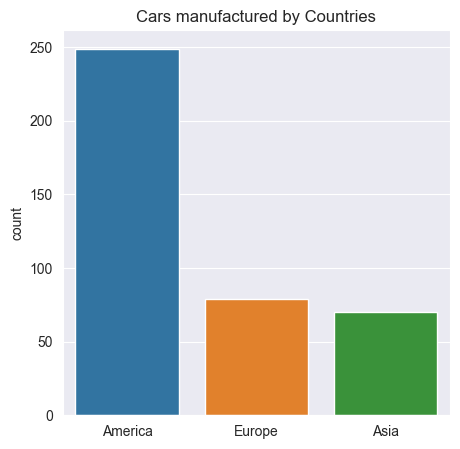

In [147]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[:3] = ['America', 'Europe', 'Asia']
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show();

## Explore the range and distribution of numerical Variables

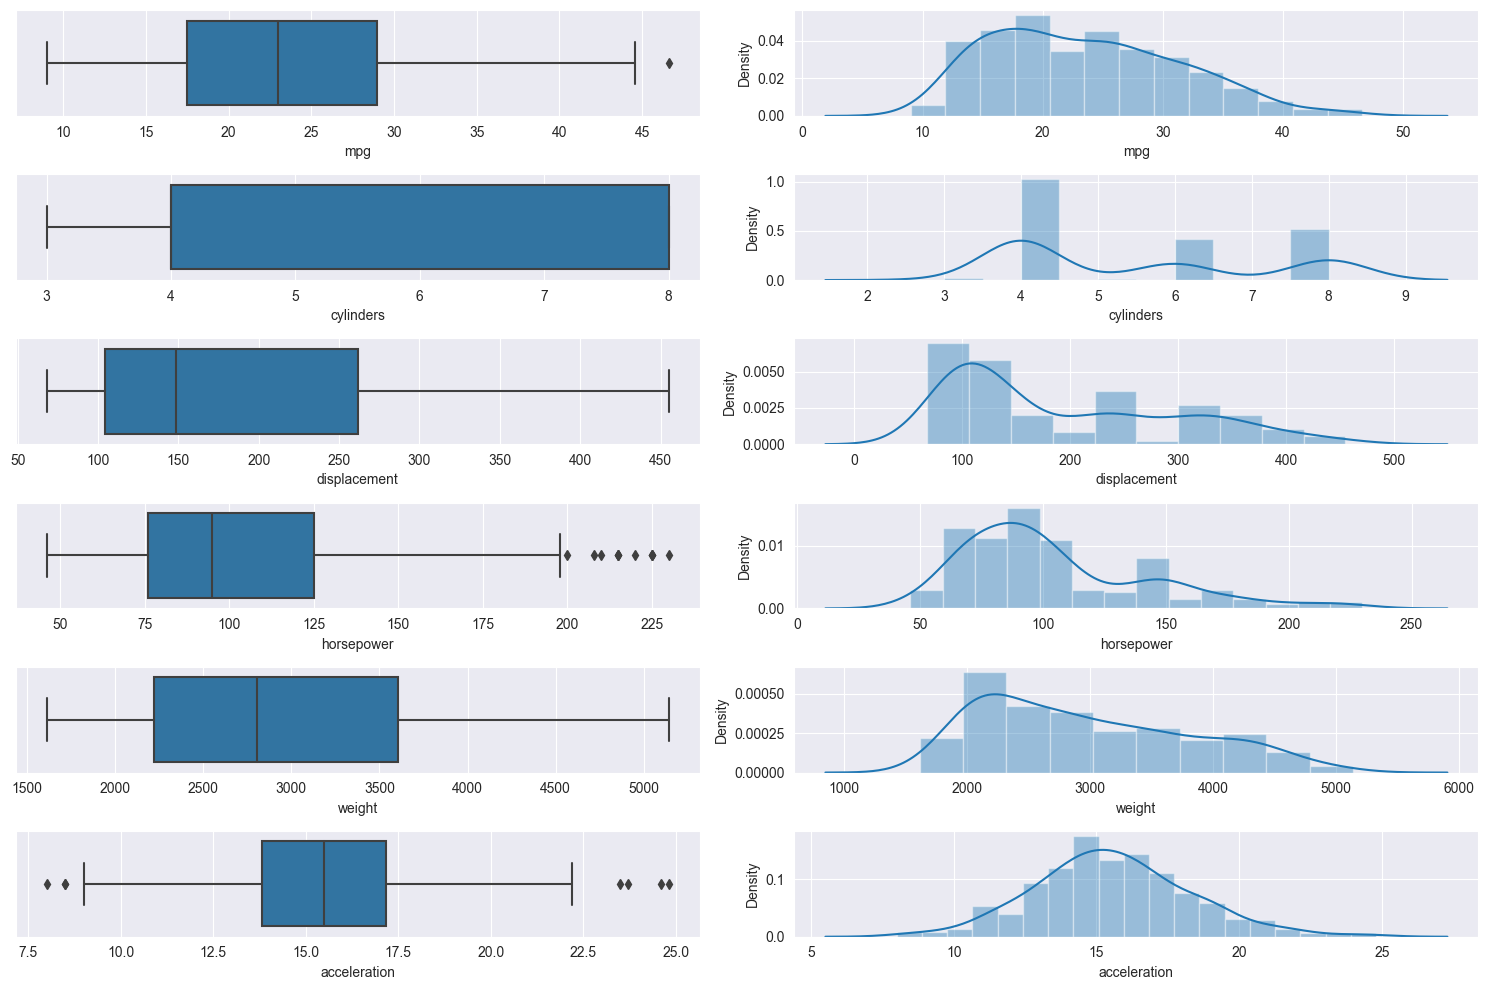

In [146]:
fig, ax = plt.subplots(6, 2, figsize = (15, 10))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
histplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
histplot(df_cars['cylinders'], ax = ax[1,1])
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
histplot(df_cars['displacement'], ax = ax[2,1])
sns.boxplot(x= df_cars["horsepower"], ax = ax[3,0])
histplot(df_cars['horsepower'], ax = ax[3,1])
sns.boxplot(x= df_cars["weight"], ax = ax[4,0])
histplot(df_cars['weight'], ax = ax[4,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[5,0])
histplot(df_cars['acceleration'], ax = ax[5,1])
plt.tight_layout();

## Plot the numerical variables

<Figure size 640x480 with 0 Axes>

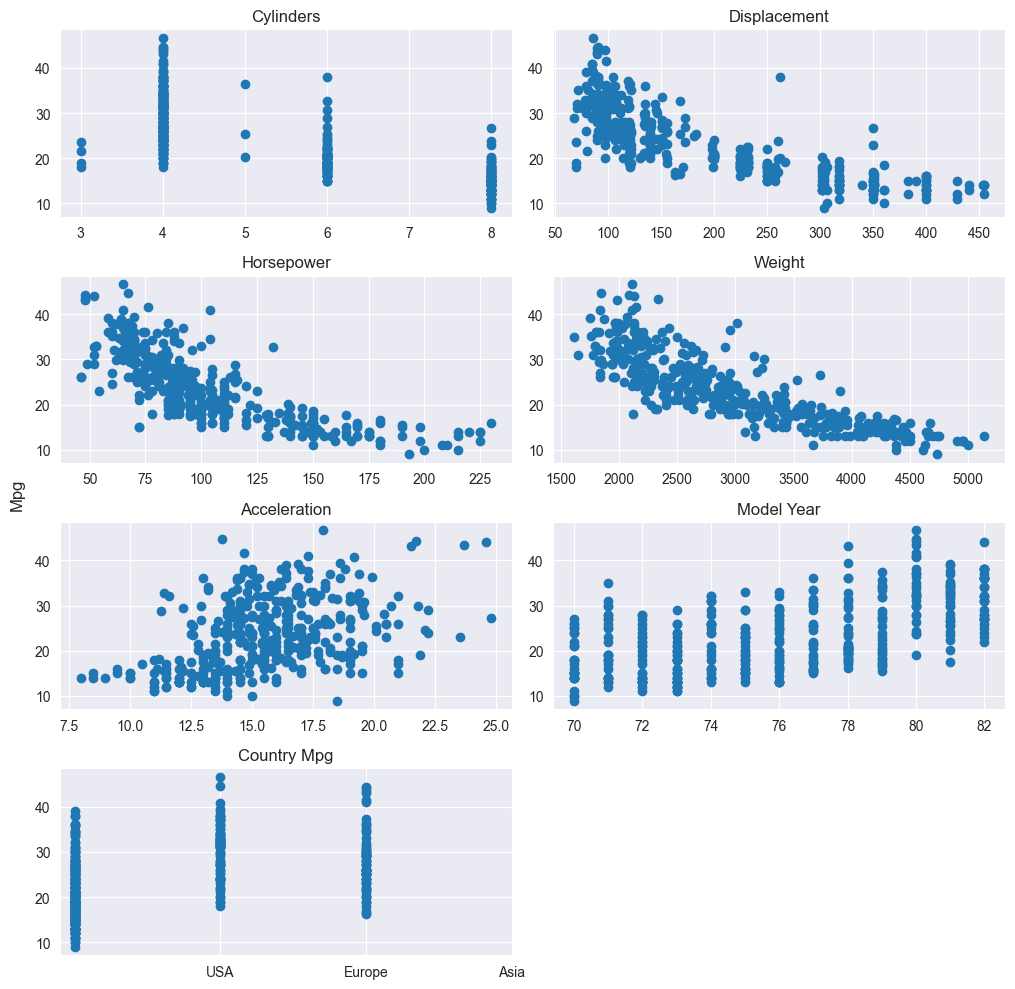

In [150]:
plt.figure(1)
f,axarr = plt.subplots(4,2, figsize=(10,10))

mpgval = df_cars.mpg.values

axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show();

## Observation:

So let’s find out more information from these 7 charts

Well nobody manufactures 7 cylinders. Why…Does anyone know?
- 4 cylinder has better mileage performance than other and most manufactured ones.
- 8 cylinder engines have a low mileage count… of course, they focus more on pickup( fast cars).
- 5 cylinders, performance-wise, compete none neither 4 cylinders nor 6 cylinders.
- Displacement, weight, horsepower are inversely related to mileage.
- More horsepower means low mileage.
- Year on Year Manufacturers has focussed on increasing the mileage of the engines.
- Cars manufactured in Japan majorly focus more on mileage.

# Multi-Variate Analysis
Here, more than two variables or features are analyzed together.


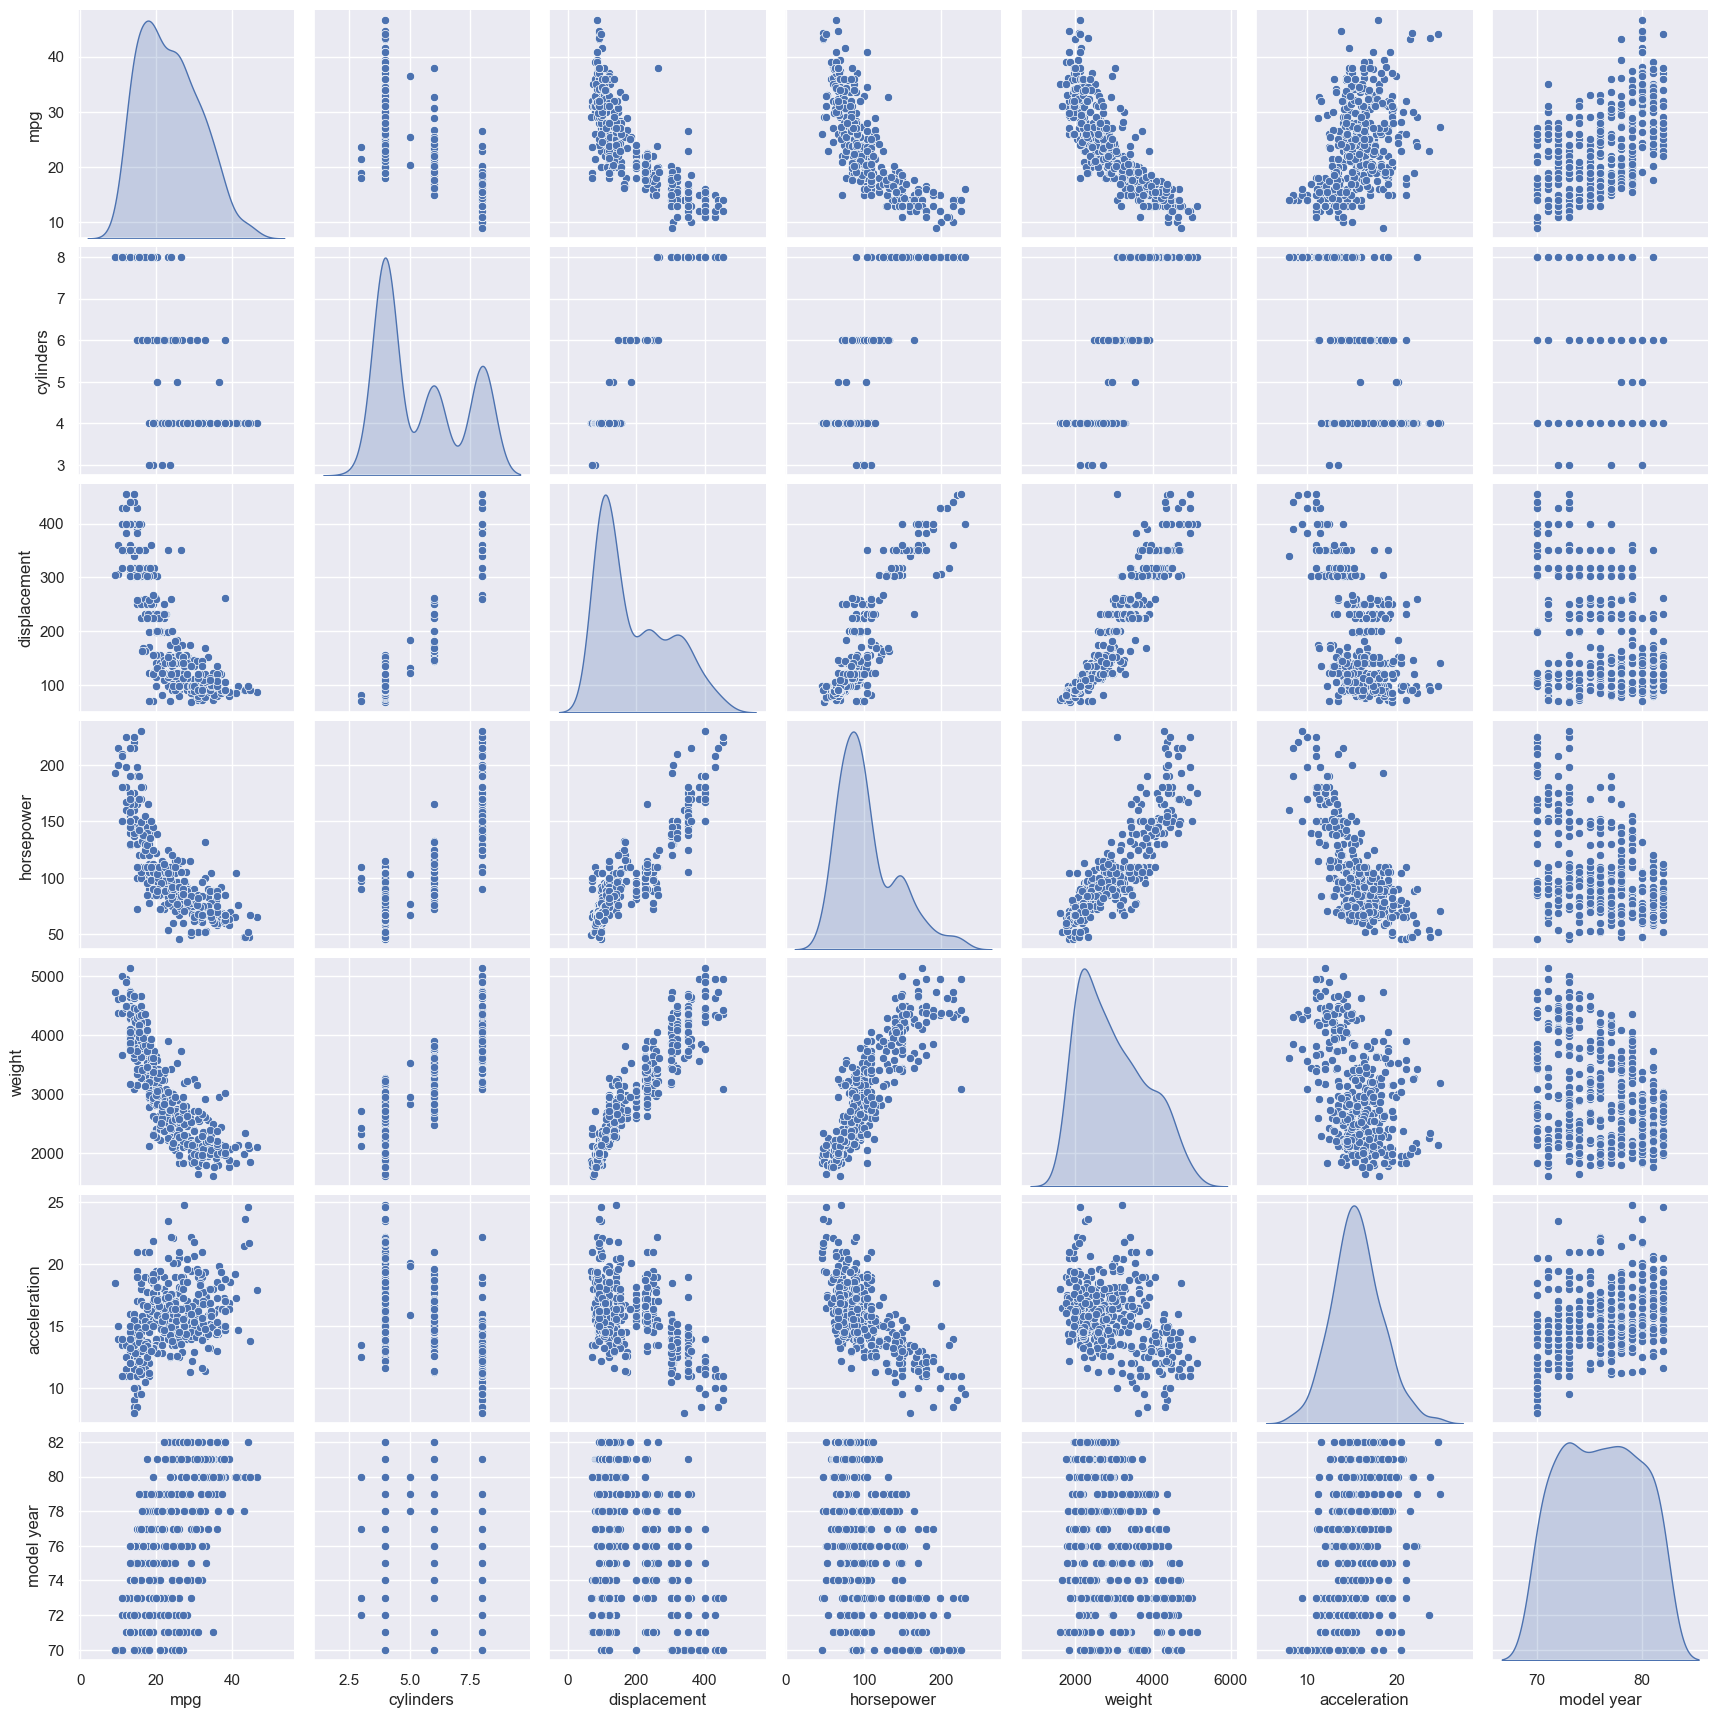

In [162]:
sns.set(rc={'figure.figsize':(12,8)})
cData_attr = df_cars.iloc[:, :8]
sns.pairplot(cData_attr, diag_kind='kde');
# Kernel density estimation(kde) is a non-parametric way to estimate the probability density function of a random variable.


# Observation

Between ‘mpg’ and other attributes indicates the relationship is not really linear.
However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern.
Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

# Distributions of the variables/features

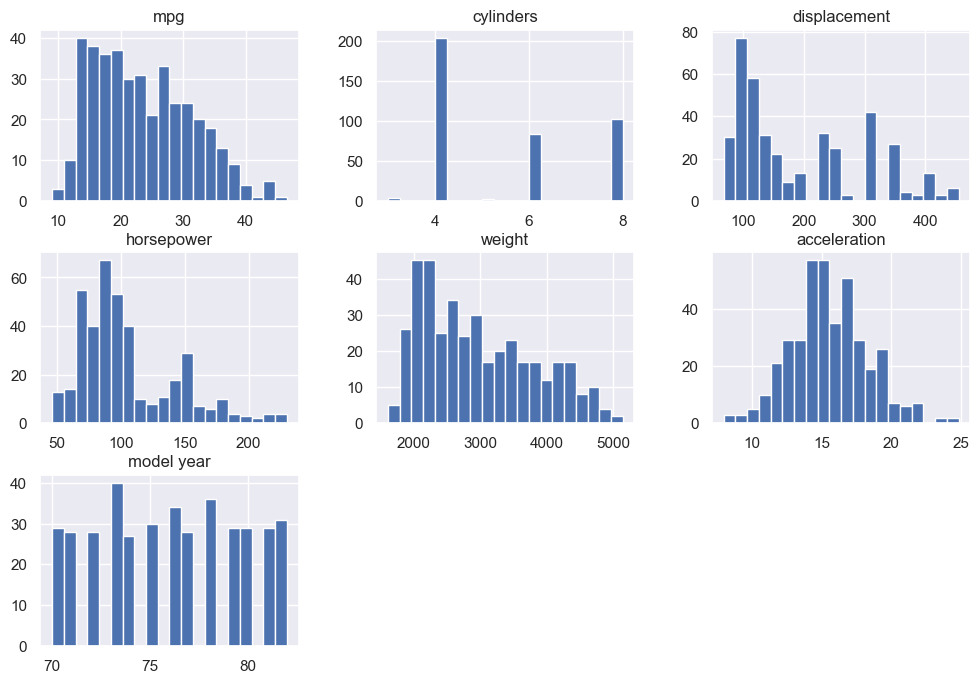

In [155]:
df_cars.hist(figsize=(12,8), bins=20)
plt.show();

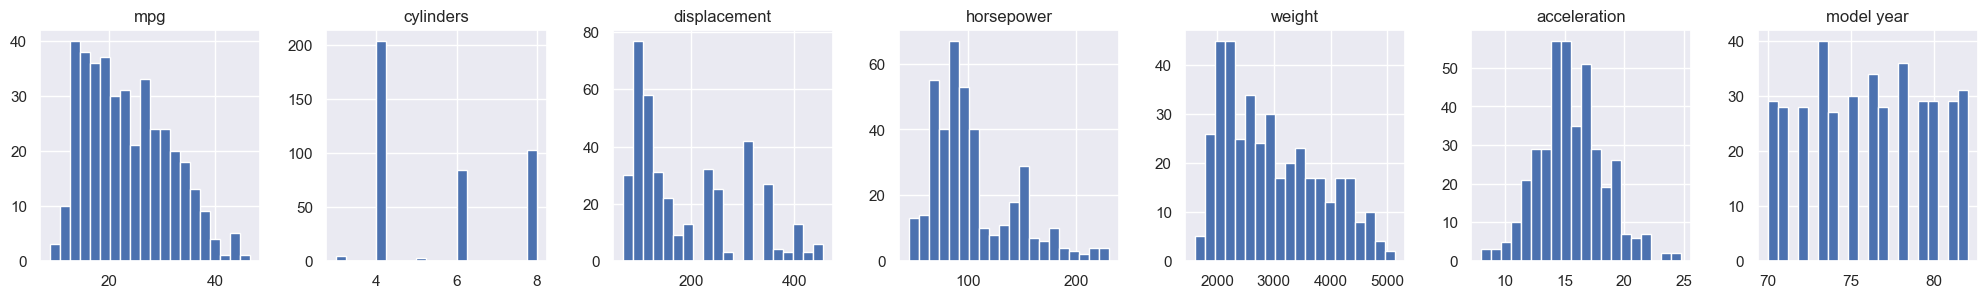

In [160]:
_, ax = plt.subplots(1, 7, figsize = (25, 3))
df_cars.hist(figsize=(12,8), bins=20, ax=ax)
plt.show();

# Observation

The acceleration of the cars in the data is normally distributed and most of the cars have an acceleration of 15 meters per second squared.
Half of the total number of cars (51.3%) in the data has 4 cylinders.
Our output/dependent variable (mpg) is slightly skewed to the right.
Let’s visualize the distribution of the features of the cars

# Correlation – By Heatmap the relationship between the features.

How to read? very simple

Dark color represents a positive correlation,
Light color/ white is a towards the negative correlation.

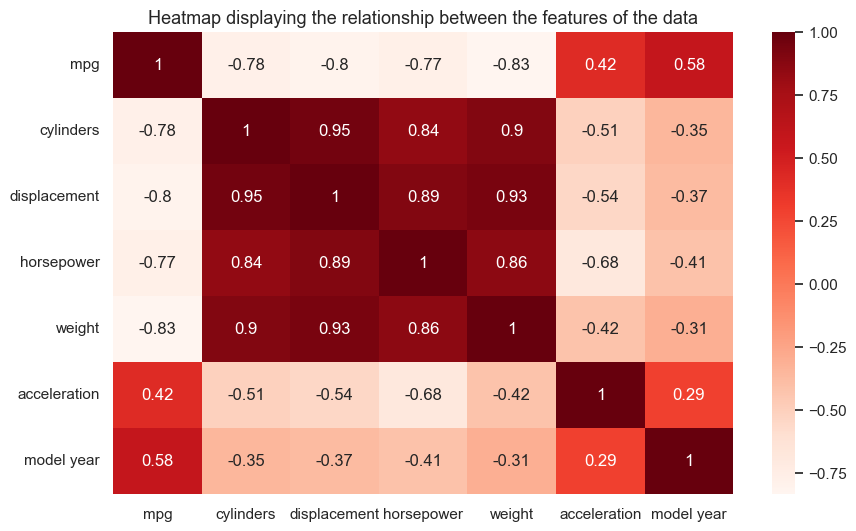

In [157]:
plt.figure(figsize=(10,6))
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
sns.heatmap(df_cars[cols].corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data', fontsize=13)
plt.show();

# Relationship between the Miles Per Gallon (mpg) and the other features.

We can see that there is a relationship between the mpg variable and the other variables and this satisfies the first assumption of Linear regression.
- Strong Negative correlation between displacement, horsepower, weight, and cylinders.
This implies that, as any one of those variables increases, the mpg decreases.

- Strong Positive correlations between the displacement, horsepower, weight, and cylinders.
This violates the non-multicollinearity assumption of Linear regression.
Multicollinearity hinders the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.

The other variables.ie.acceleration, model, and origin are NOT highly correlated with each other.